In [1]:
from pydataset import data # importing librabries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import env
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
from explore import plot_variable_pairs
from explore import plot_categorical_and_continuous_vars

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
df = wrangle_zillow()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2,1.0,1412,222671,1947,2954.03,6037
1,3,2.0,1296,64968,1955,909.28,6037
2,3,1.0,1044,126800,1947,1767.69,6037
3,3,2.0,1336,213833,1955,2699.34,6037
4,3,2.0,1510,338022,1979,4166.31,6037


In [5]:
df.shape

(54579, 7)

In [5]:
def train_validate_test_split(df, seed=123):
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed, 
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.2,
        random_state=seed,
    )
    return train, validate, test

In [6]:
train_validate_test_split(df, seed=123)

(       bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 31553           3          2.0                          1693   
 32569           3          2.0                          1338   
 8710            3          2.0                          1529   
 15399           3          2.0                          1245   
 31683           4          2.5                          2077   
 ...           ...          ...                           ...   
 18000           5          2.0                          1889   
 53498           4          2.5                          2305   
 6520            3          1.0                          1569   
 8362            3          2.0                          1322   
 36607           0          0.0                          7320   
 
        taxvaluedollarcnt  yearbuilt  taxamount  fips  
 31553             522153       1984    6359.26  6059  
 32569             193357       1984    2364.23  6037  
 8710              241301       1960    3239.14  6

In [7]:
train, validate, test = train_validate_test_split(df, seed=123)

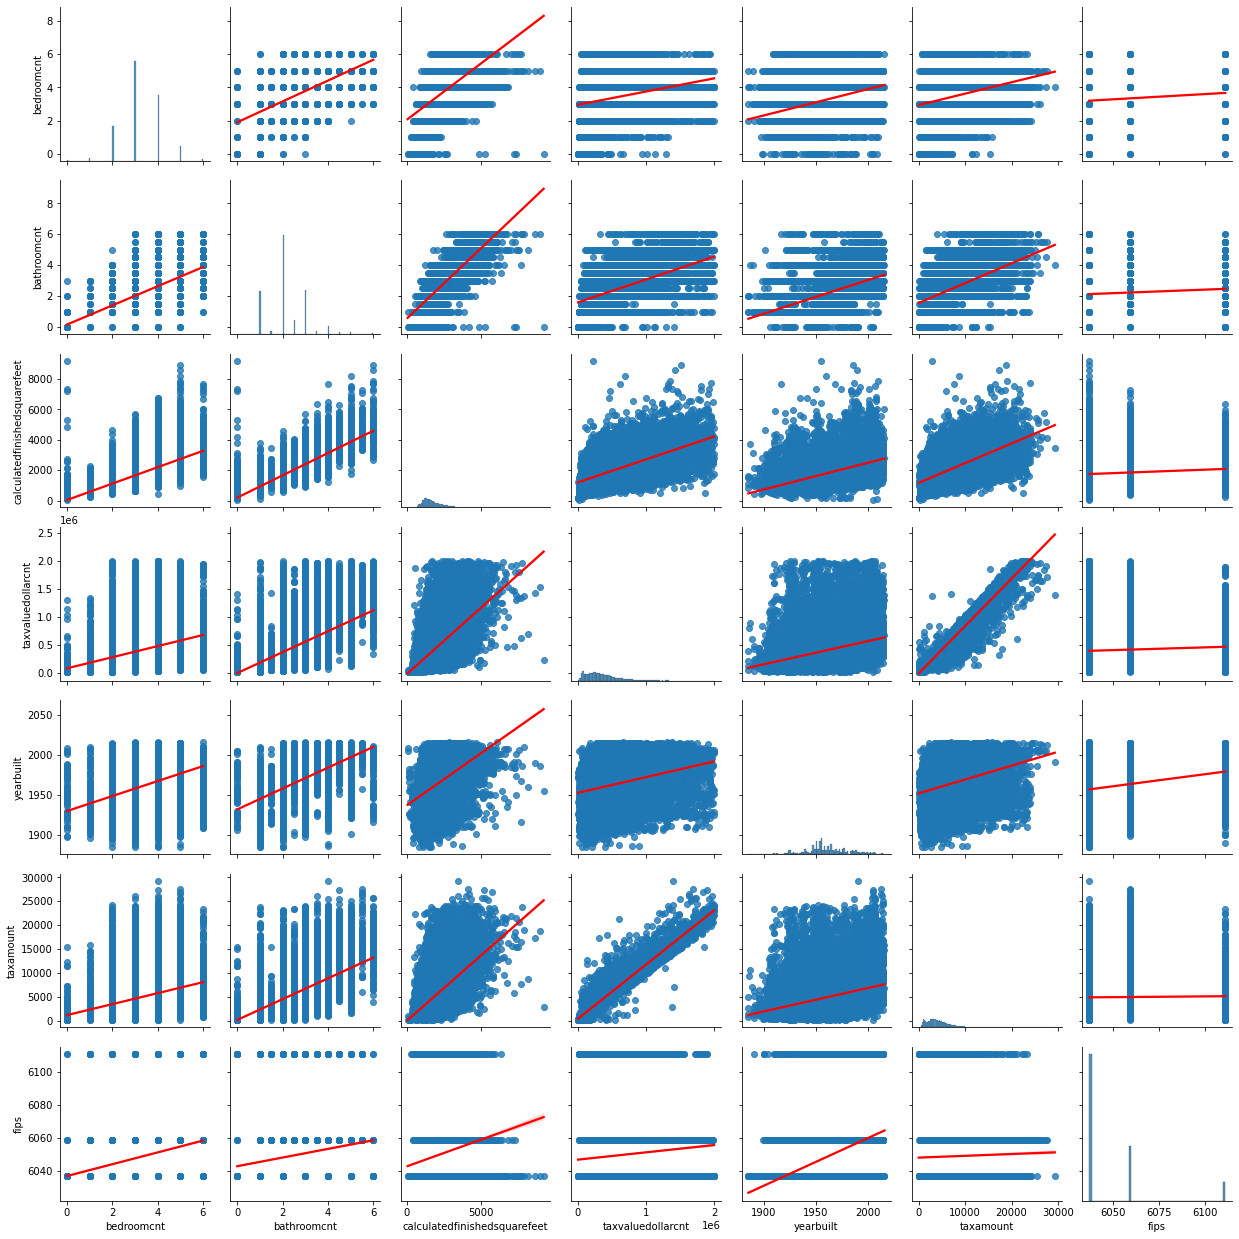

In [8]:
plot_variable_pairs(train)

In [9]:
continuous_vars = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']
categorical_vars = ['bathroomcnt', 'bedroomcnt', 'yearbuilt', 'fips']

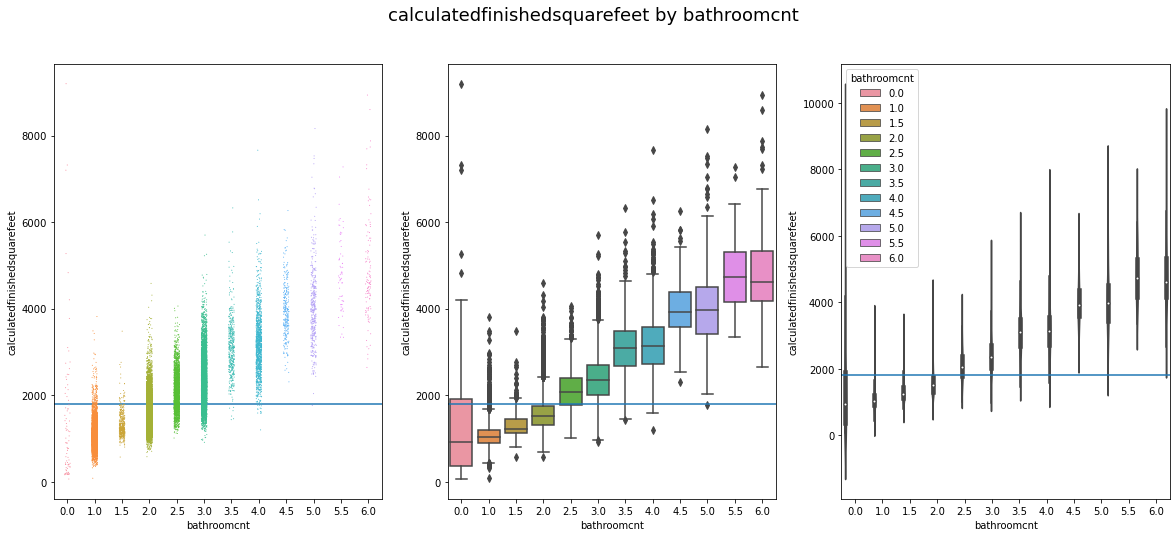

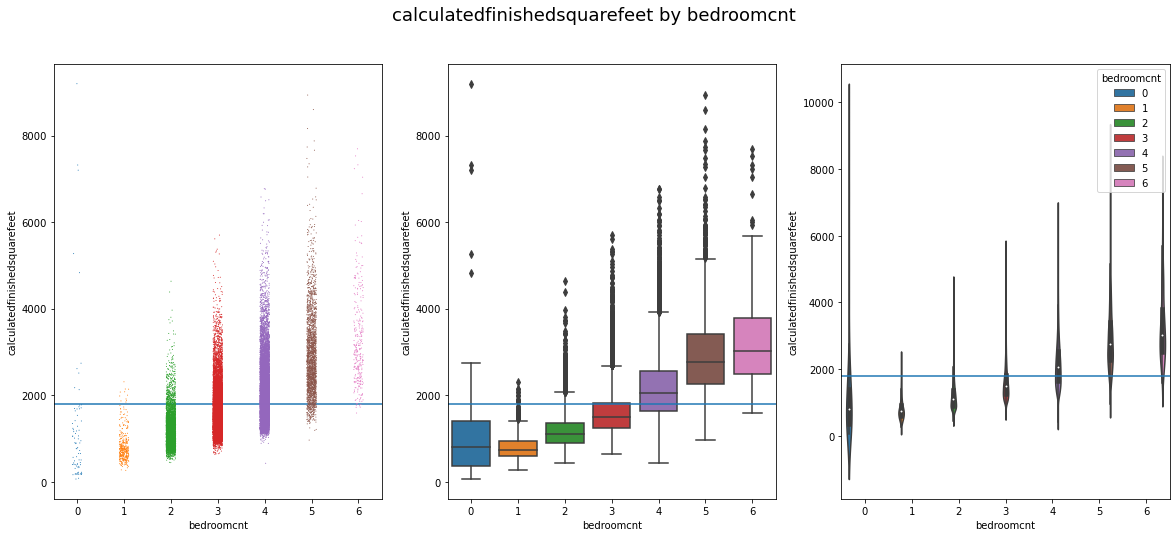

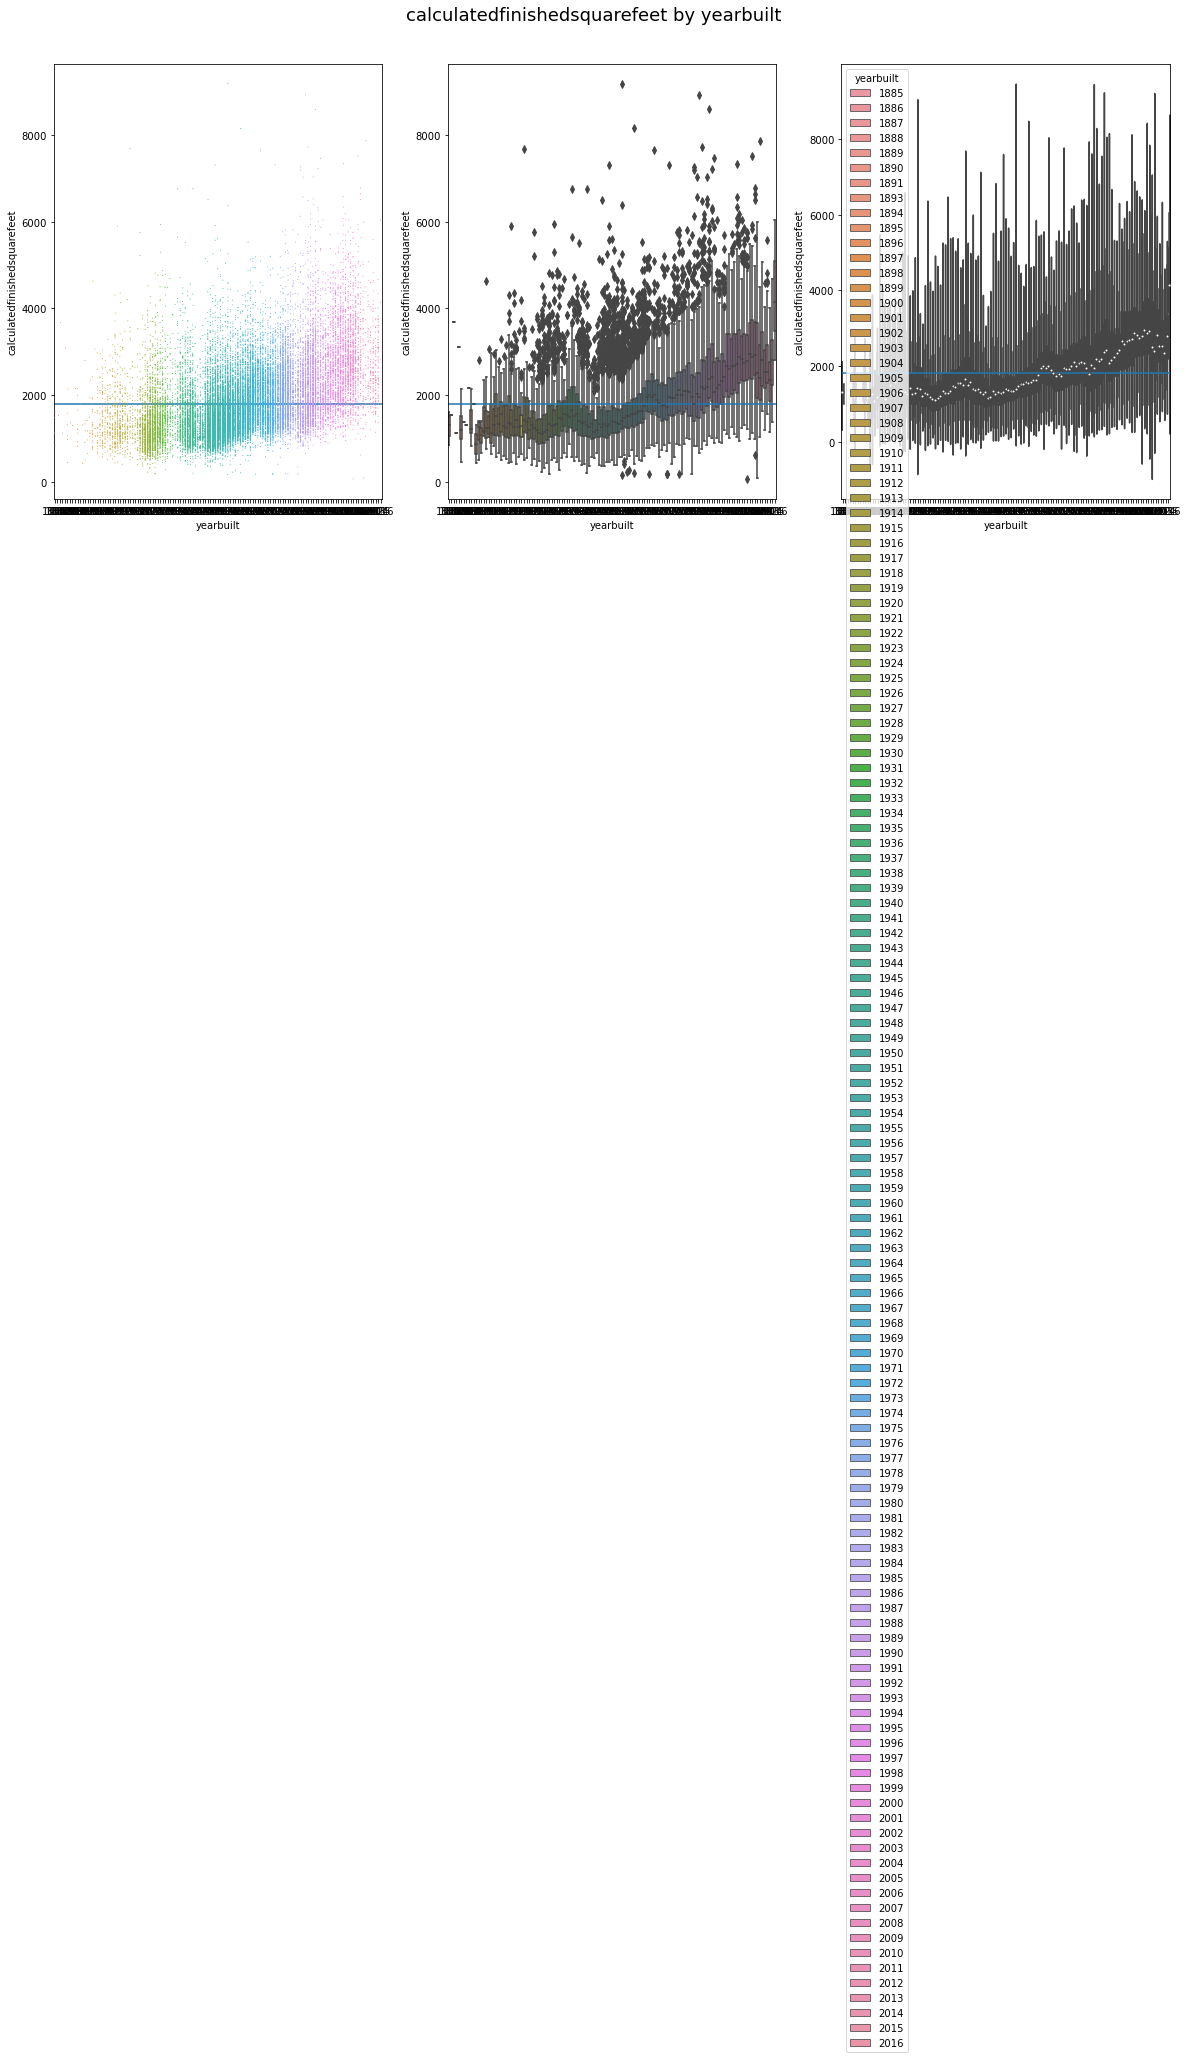

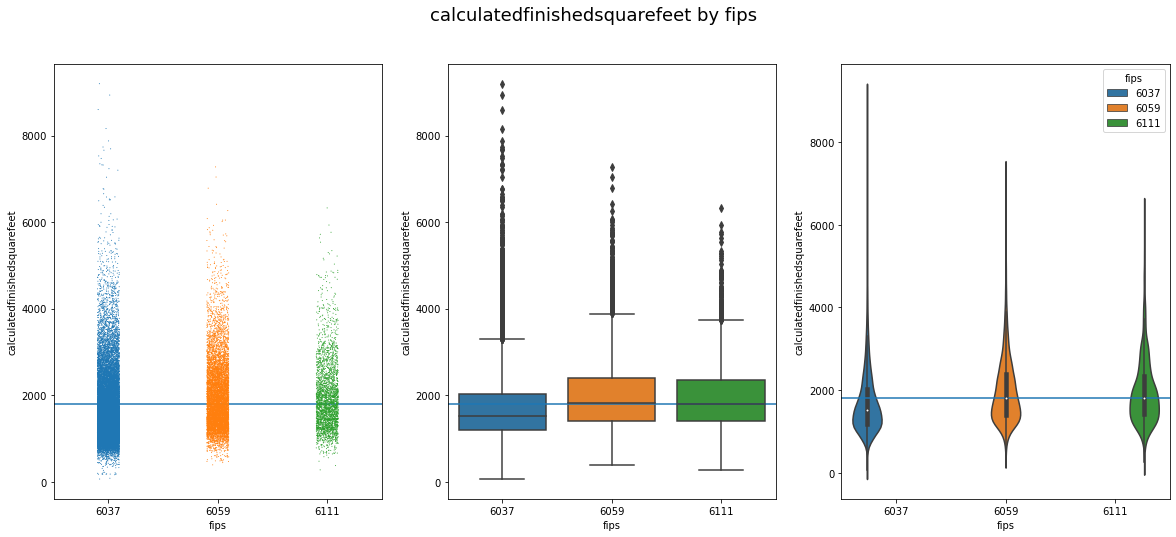

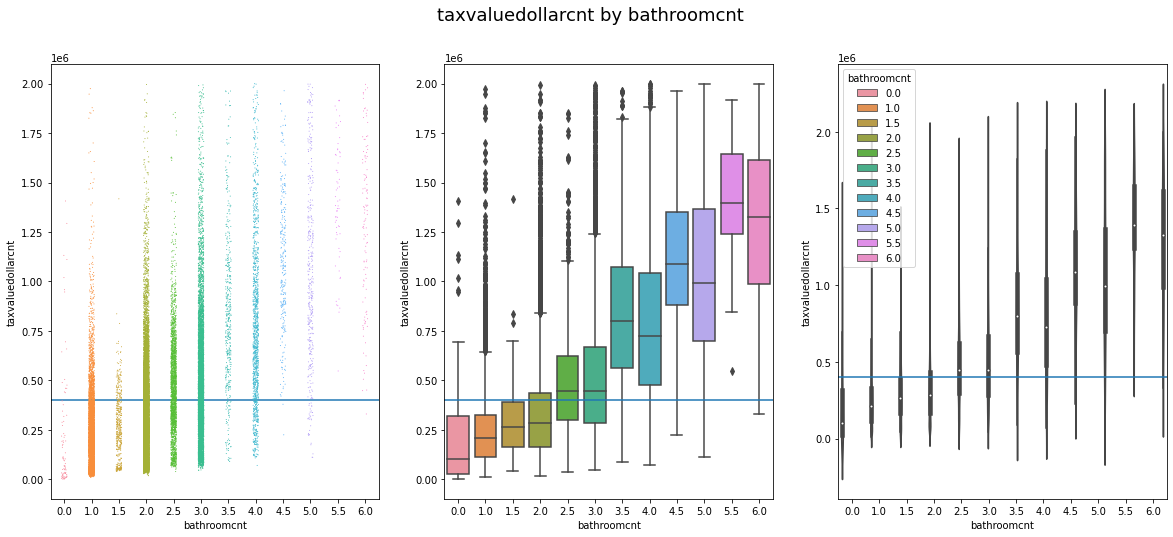

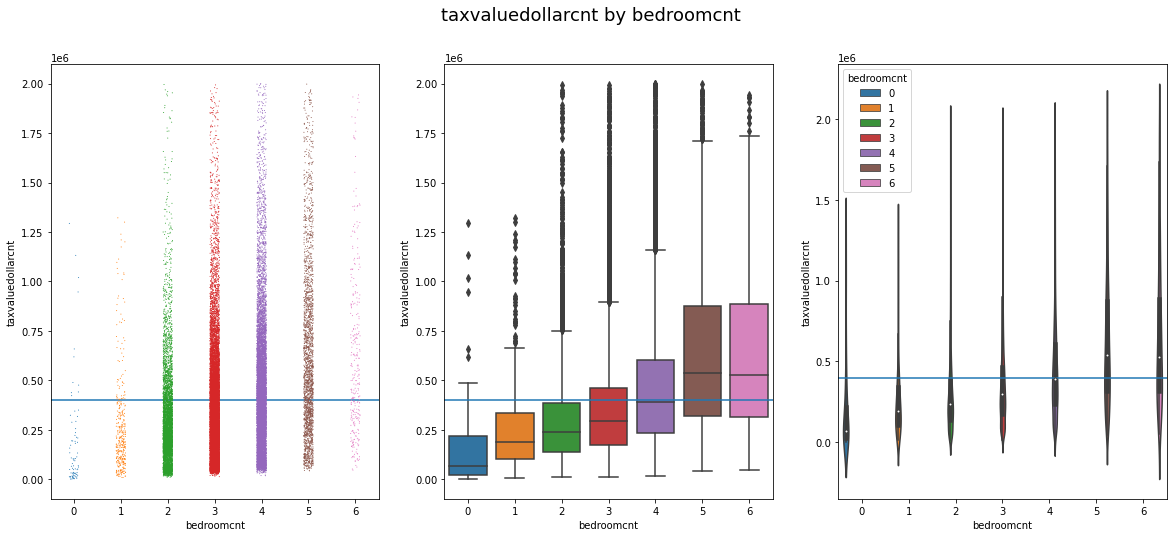

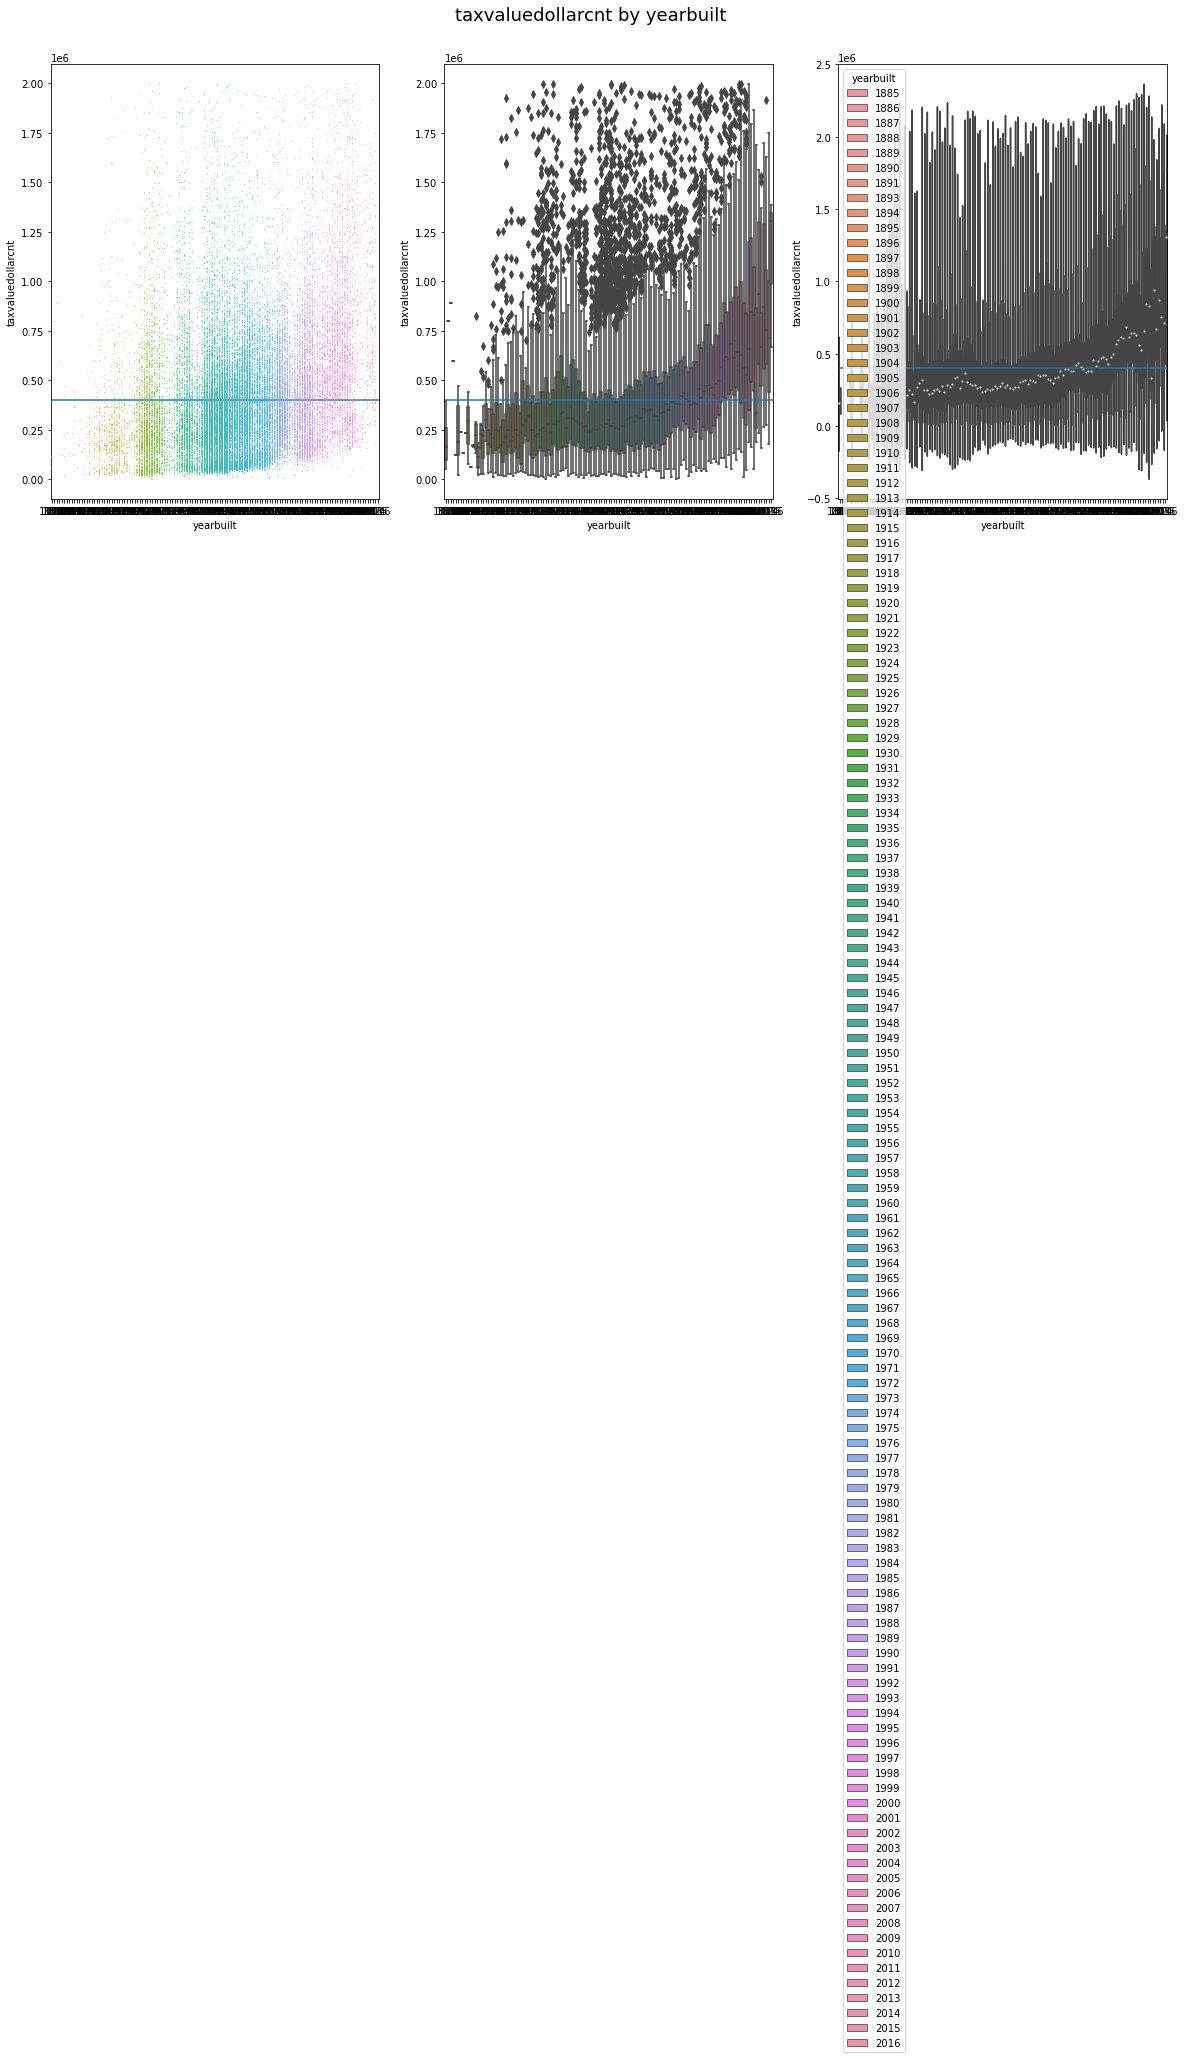

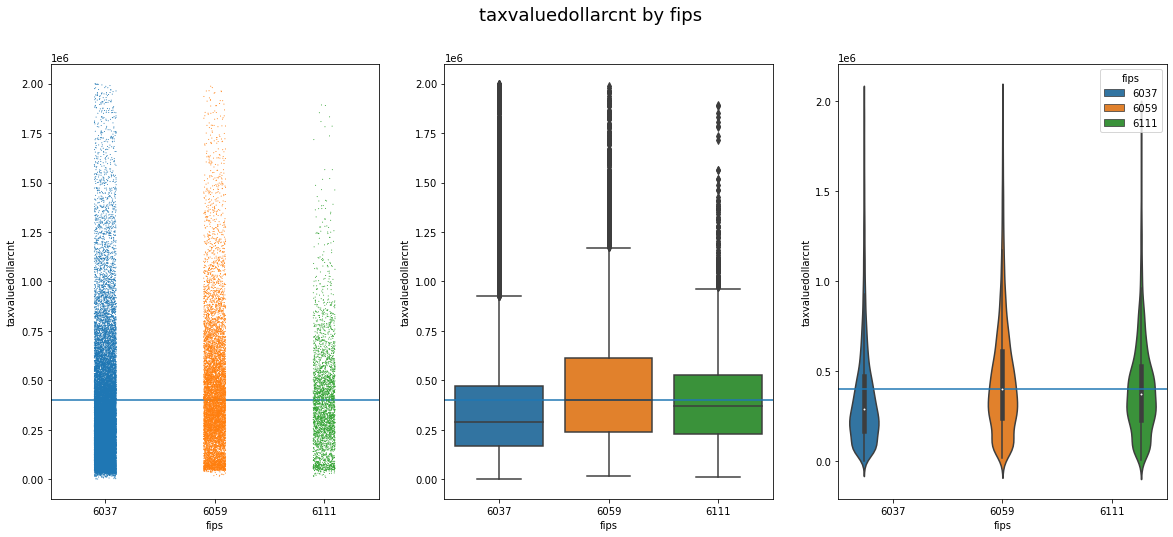

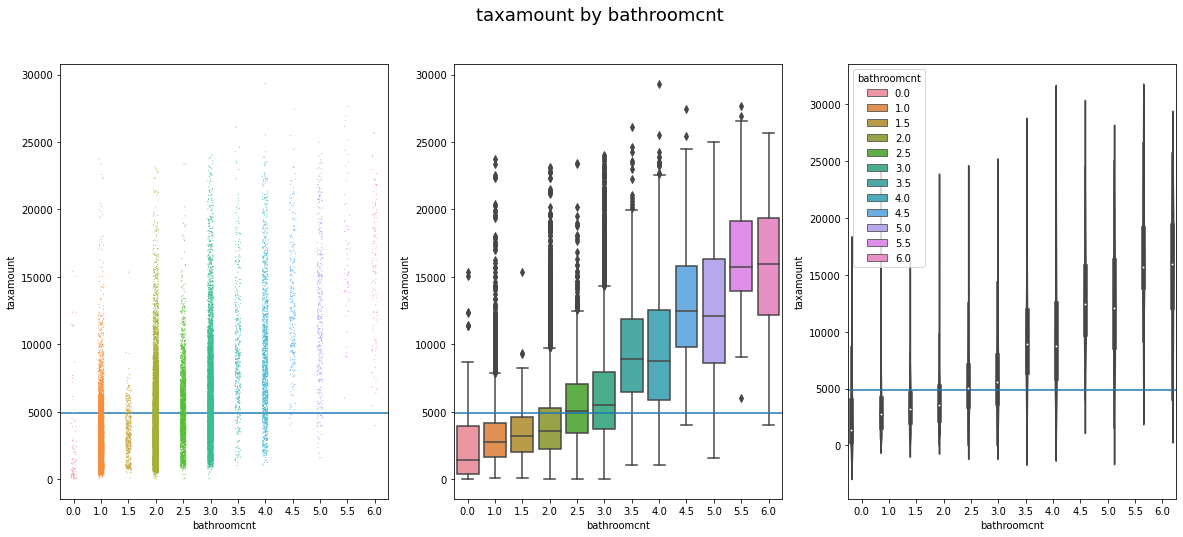

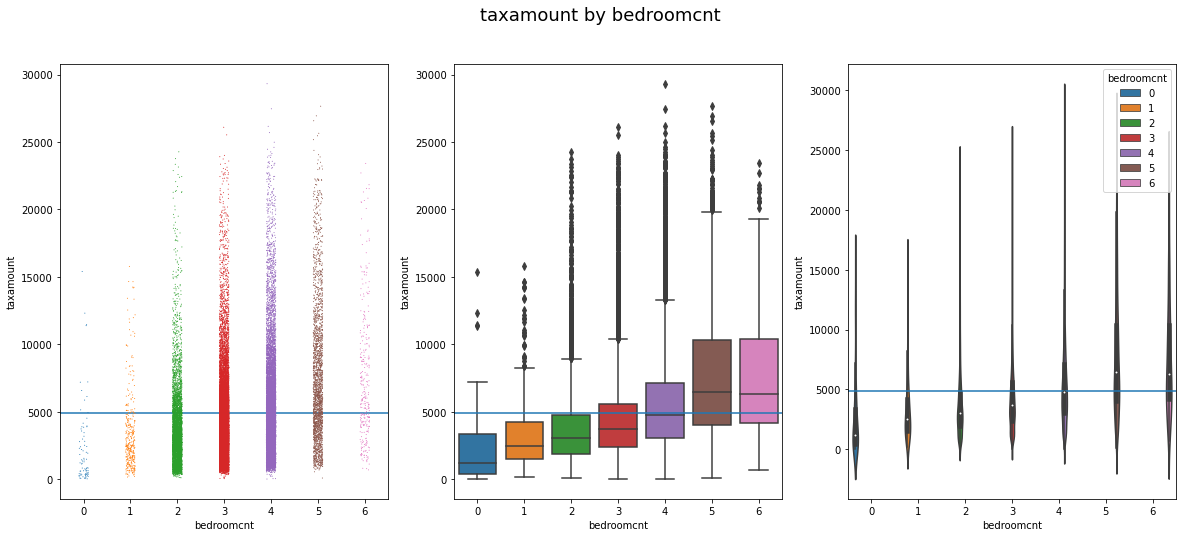

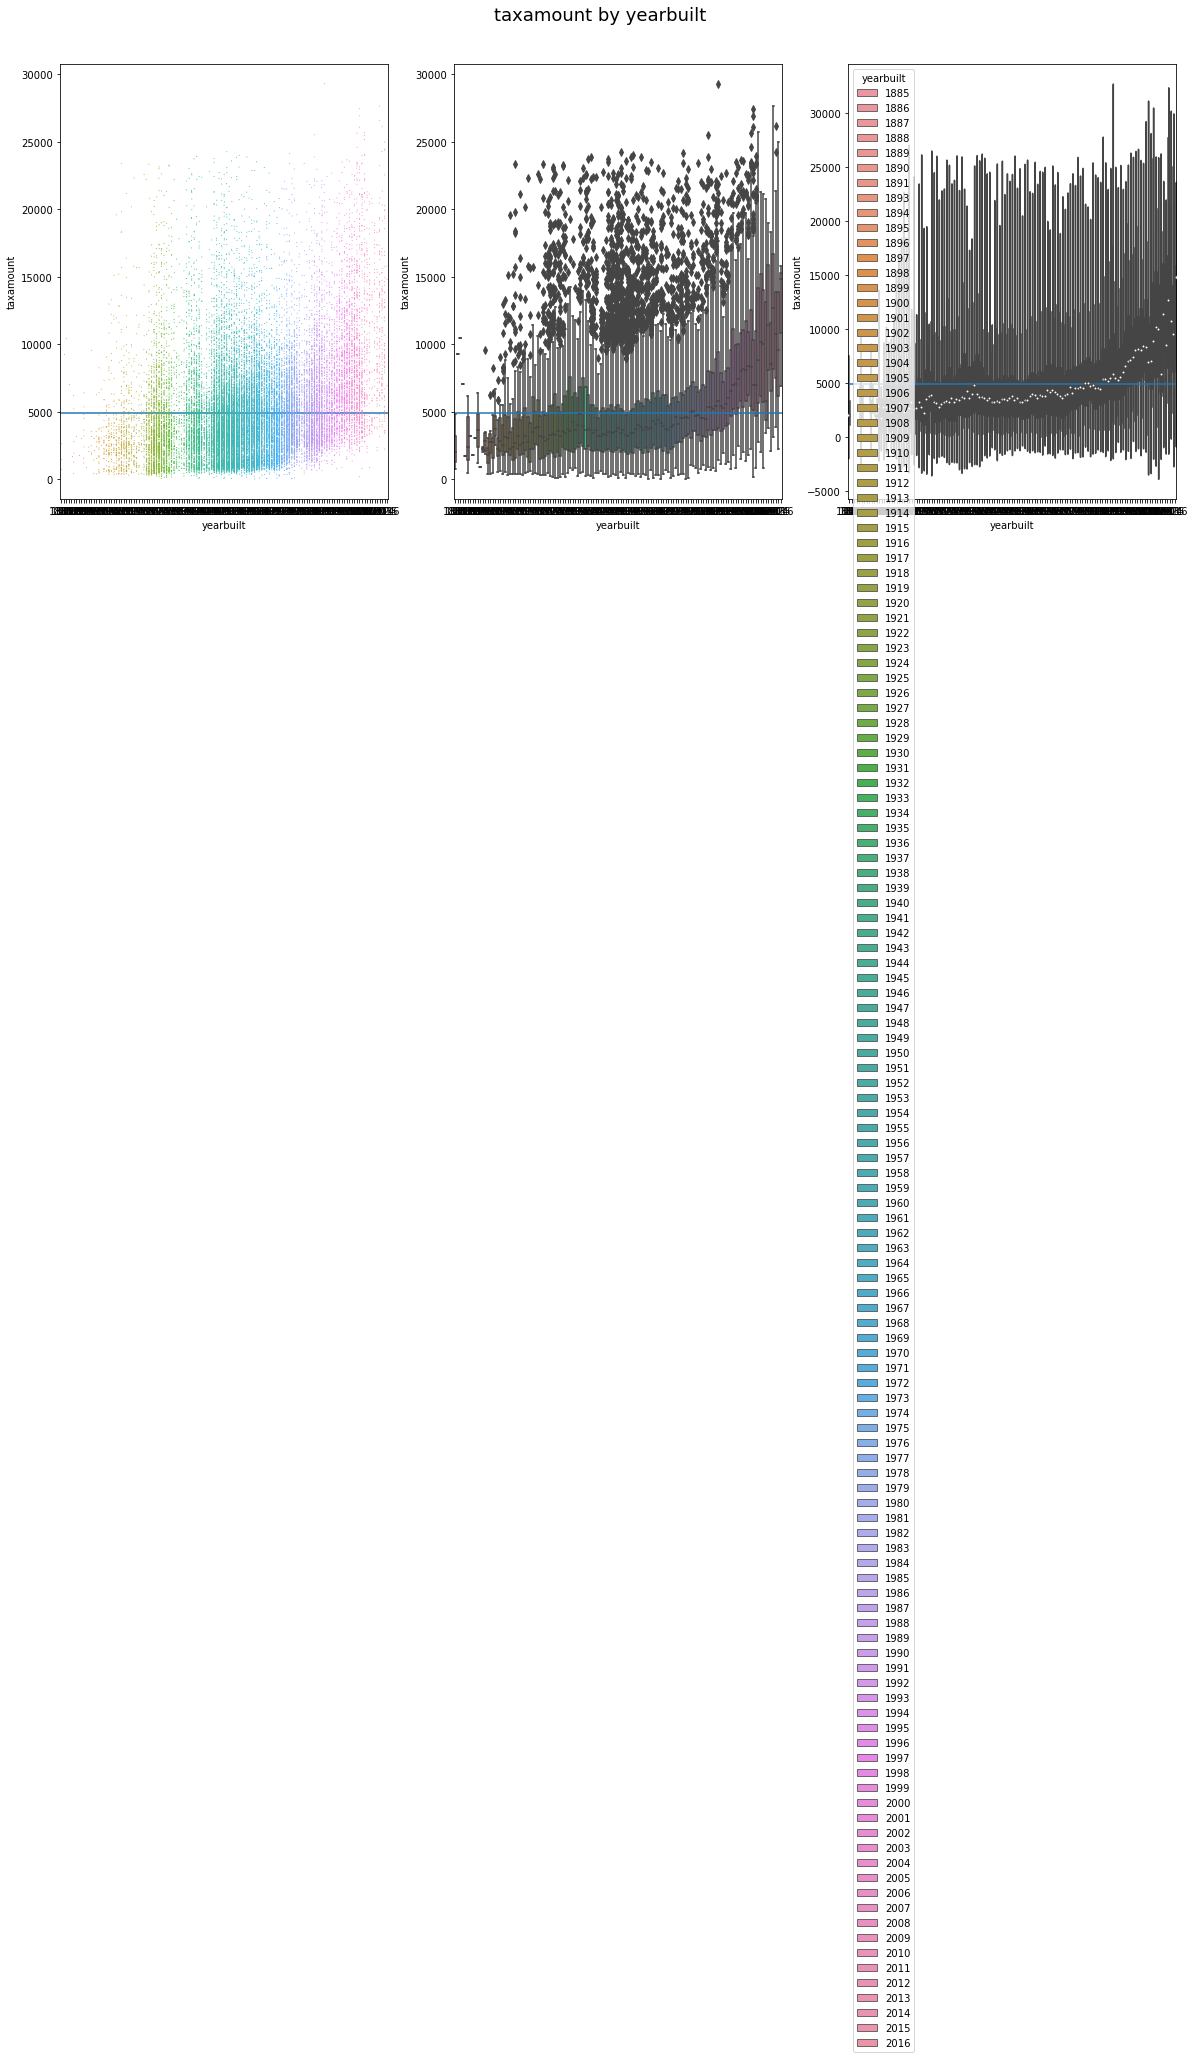

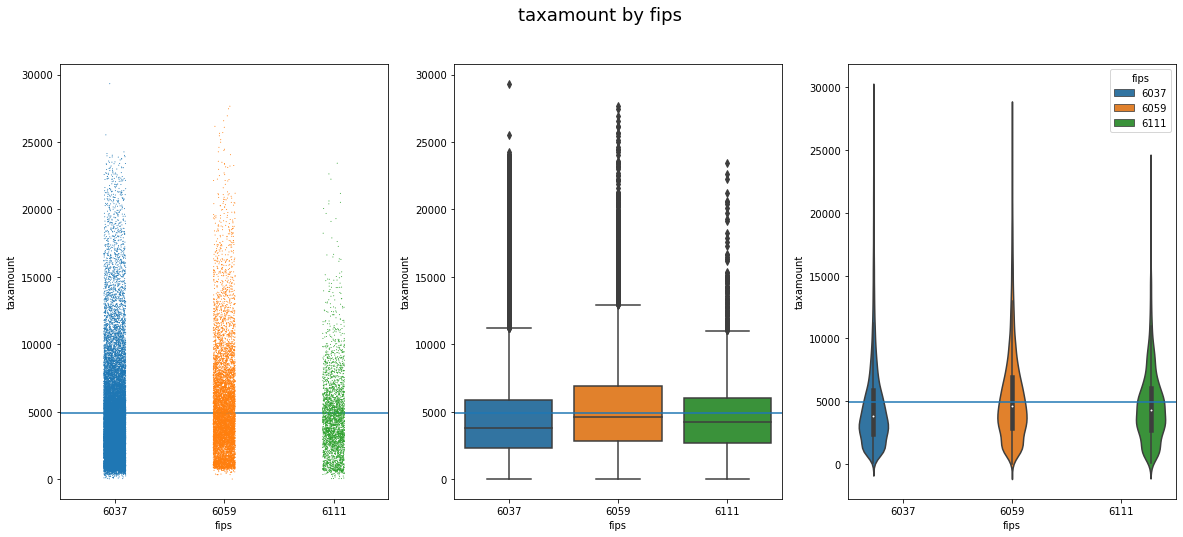

In [10]:
plot_categorical_and_continuous_vars(train, categorical_vars, continuous_vars)